## 딥러닝

In [53]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


1. 입력과 출력 훈련 데이터 정의
2. 모델 정의
3. 학습 과정 설정(loss, optimizer, metrics)
4. 훈련 fit
5. 평가 evaluate

In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model= Sequential()

#30개 노드, 17개 입력 특성
model.add(Dense(30, input_dim=17, activation='relu'))

# 출력층, 노드 1, 시그모이드
model.add(Dense(1, activation='sigmoid'))

model.compile(loss  = 'mean_squared_error', optimizer='adam',
             metrics=['accuracy'])



### 오차함수
- MSE = 수렴하기까지 속도가 많이 걸림
- mean_absolute_error ....

-  교차 엔트로피 = 오차가 커지면 수렴 속도 증가, 작아지면 감소
-  이진분류는 binary_crossentropy
-  다중분류는 categorical_crossentropy

### 최적화

- 각 층의 가중치 조정
- adam, SGD, Momentum, NAG, Adagrad, RMSProp ....

### 모델 실행

- model.fit()
- epoch = 학습 프로세스가 모든 샘플에 대해 한 번 실행
- batch_size = 샘플을 한 번에 몇 개씩 처리할지


- validation_split / validation_data / class_weight

In [8]:
lists = os.listdir('./')
lists

['.ipynb_checkpoints', 'ThoraricSurgery.csv', 'Untitled.ipynb']

In [19]:
datas = np.loadtxt('./ThoraricSurgery.csv', delimiter=',')

# 폐암 데이터

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.models import load_model

In [17]:
seed = 0

In [20]:
datas

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [21]:
datas.shape

(470, 18)

In [22]:
X = datas[:,0:17]
y = datas[:,17]
# 17개의 특성까지

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,
                                                   random_state=seed)

In [23]:
model = Sequential()

#입력층
model.add(Dense(30, input_dim=17, activation='relu'))
#출력층
model.add(Dense(1, activation='sigmoid'))
#환경설정
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#훈련
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)

# 0 = silent , 1 = progress bar, 2 = one line per epoch


Epoch 1/100
33/33 - 0s - loss: 0.5732 - accuracy: 0.3799
Epoch 2/100
33/33 - 0s - loss: 0.1657 - accuracy: 0.8328
Epoch 3/100
33/33 - 0s - loss: 0.1640 - accuracy: 0.8359
Epoch 4/100
33/33 - 0s - loss: 0.1640 - accuracy: 0.8359
Epoch 5/100
33/33 - 0s - loss: 0.1640 - accuracy: 0.8359
Epoch 6/100
33/33 - 0s - loss: 0.1639 - accuracy: 0.8359
Epoch 7/100
33/33 - 0s - loss: 0.1639 - accuracy: 0.8359
Epoch 8/100
33/33 - 0s - loss: 0.1638 - accuracy: 0.8359
Epoch 9/100
33/33 - 0s - loss: 0.1638 - accuracy: 0.8359
Epoch 10/100
33/33 - 0s - loss: 0.1636 - accuracy: 0.8359
Epoch 11/100
33/33 - 0s - loss: 0.1631 - accuracy: 0.8359
Epoch 12/100
33/33 - 0s - loss: 0.1613 - accuracy: 0.8359
Epoch 13/100
33/33 - 0s - loss: 0.1605 - accuracy: 0.8389
Epoch 14/100
33/33 - 0s - loss: 0.1602 - accuracy: 0.8389
Epoch 15/100
33/33 - 0s - loss: 0.1605 - accuracy: 0.8359
Epoch 16/100
33/33 - 0s - loss: 0.1610 - accuracy: 0.8359
Epoch 17/100
33/33 - 0s - loss: 0.1614 - accuracy: 0.8328
Epoch 18/100
33/33 - 0s

In [32]:
print("Accuracy : ", model.evaluate(X_test, y_test)[1])
print("Loss : {:.3f}".format(model.evaluate(X, y)[0]))

# 1 = accuracy, 0 = loss

5/5 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.8865
Accuracy :  0.8865247964859009
15/15 [==============================] - 0s 1ms/step - loss: 0.1406 - accuracy: 0.8532
Loss : 0.141


In [33]:
model.summary()

# 17*30+30 = 540
# 특성별 노드 30개 + 편향 30

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [104]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=.7, color=True)
image_shape = people.images[0].shape
print(image_shape)

print(people.keys())
print(people.images.shape)
print(people.data.shape)
print(len(people.target_names))

(87, 65, 3)
dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
(3023, 87, 65, 3)
(3023, 16965)
62


In [ ]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for t in np.unique(people.target):
    mask[np.where(people.target==t)[0][:20]] =1
#np.where로 찾으면 arr [0] 에 그 결과가 들어옴
#거기서 50개까지를 선택
    
x_people = people.images[mask]
y_people = people.target[mask]

x_people = x_people/ 255.
#0~255 픽셀값을 0~1로 조정함.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_people,
                                                    y_people, 
                                                    random_state=0)

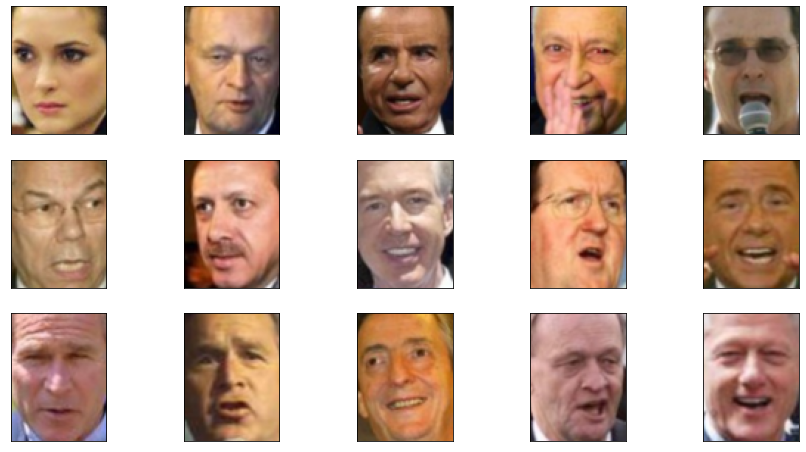

In [111]:
fig, axes = plt.subplots(3, 5 ,figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})

for t, i, ax in zip(y_people, x_people, axes.ravel()):
    ax.imshow(i)

In [102]:
from keras.layers import Conv2D, Dropout, Flatten, MaxPooling2D

In [100]:
X_train.shape[1:]

(87, 65)

In [ ]:
model = Sequential([
    Conv2D(16, kernel_size=(3,3), input_shape = X_train.shape[1:],
              activation='relu'),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=2)


In [110]:
print("Accuracy : ", model.evaluate(X_test, y_test)[1])

17/17 [==============================] - 0s 28ms/step - loss: 1193.1434 - accuracy: 0.0155
Accuracy :  0.01550387591123581
